# 2<sup>nd</sup> Lab. Linear Regression

In [1]:
# Some IPython magic
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!pip install pandas

import numpy as np
import matplotlib.pyplot as plt

#Python crash course cont.

- list comprehension \w nested lists
- iterator
- generator
- lambda functions (function keys as functions)
- filter, map

## More on list comprehensions
We have seen list comprehensions on simple lists, like the following:

In [2]:
numbers = range(10)
squares = [x**2 for x in numbers]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


But if we had nested lists, how would we use list comprehension? Replace the code below with a one line instruction!

Hint: `str.join()` 

In [3]:
data = [["Bike", "sharing", "systems"],
        ["are","a", "new","generation"],
        ["of","traditional", "bike", "rentals"], 
        ["where","the","whole","process"],
        ["from","membership,","rental","and","return"],
        ["has","become","automatic."]]
text = ""
for line in data:
  for word in line:
    text = text + " " + word
print(text)
print(" ".join([item for line in data for item in line]))

# TODO one-liner to join all the text


 Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic.
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic.


You can define iterators as classes:

## Generators

A generator is a function that produces a sequence of results instead of a single value.

### Generator expressions

Generator expressions are similar to list comprehensions, but return a generator.

In [4]:
a = (x*x for x in range(10))
a

<generator object <genexpr> at 0x7fa020507c80>

In [5]:
# try running this twice.
sum(a)

285

Note that once a generator has been consumed, you can't reiterate through its elements!

### Generator functions

When a generator function is called, it returns a generator object without even beginning execution of the function. When `next` method is called for the first time, the function starts executing until it reaches `yield` statement. The yielded value is returned by the `next` call.

In [6]:
def gen_range(n):
    i = 0
    while i < n:
        yield i
        i += 1

gen_range(2)

<generator object gen_range at 0x7f9ffcb65dc0>

Due to the behaviour of generators, we can generate infinite sequences.

In [7]:
def integers():
    """Infinite sequence of integers."""
    i = 1
    while True:
        yield i
        i = i + 1

def squares():
    for i in integers():
        yield i * i

### Filter, map and lambda

Let's say we have this list of some numbers. How do we go about doing these operations?

1. Get all elements less than 20
2. Square all the numbers

One possibility would be to iterate over the list, apply these operations and create a new list. But the pythonic way is to use **filter** and **map**. 

In [8]:
my_list = [4, 5, 12, 54, 23, 3, 6, 125]


# Old, ugly, non-pythonic way
filtered = []
for element in my_list:
   if element < 20:
      filtered.append(element)
      
squared = []
for element in my_list:
  squared.append(element ** 2)

print(filtered, squared)

([4, 5, 12, 3, 6], [16, 25, 144, 2916, 529, 9, 36, 15625])


In [9]:
# Pythonic master race

filtered = list(filter(lambda x: x < 20, my_list))
squared = list(map(lambda x: x**2, my_list))

print(filtered, squared)

([4, 5, 12, 3, 6], [16, 25, 144, 2916, 529, 9, 36, 15625])


The **filter()** function returns an iterator where the items are filtered through a function to test if the item is accepted or not. 

The **map()** function executes a specified function for each item in a iterable. The item is sent to the function as a parameter.



# Linear Regression

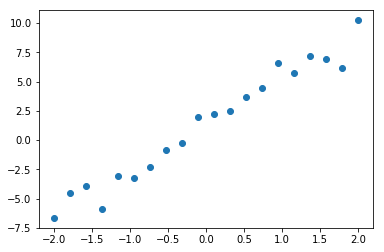

In [10]:
np.random.seed(0)

x = np.linspace(-2, 2, 20)
y = (np.random.uniform(-10, 10) * x ** 0 + np.random.uniform(-10, 10) * x ** 1)
y += np.random.randn(*y.shape)

plt.plot(x, y, 'o')

## Least Squares solution (Simple linear regression)
Find the solution using numpy operations. The formulas for the coeficients are:

$$ w_1 = \frac{\sum_i[(x^{(i)}-\bar{x})(y^{(i)}-\bar{y})]}{\sum_i(x^{(i)}-\bar{x})^2} $$

$$ w_0 = \displaystyle{\frac{1}{m} (\sum_i y^{(i)} - w_1 \sum_i x^{(i)})} = \bar{y} - w_1 \bar{x}  $$

In [11]:
# TODO compute values for w1, w0
w1 = np.sum(np.abs((x-np.mean(x))*(y-np.mean(y)))) / np.sum( (x-np.mean(x))**2)
# w0 = 1/len(x) * (np.sum(x) - w1* np.sum(x))
w0 = np.mean(y) - w1*np.mean(x)

print(w1)
print(w0)

3.9256160056435117
1.3424256327556996


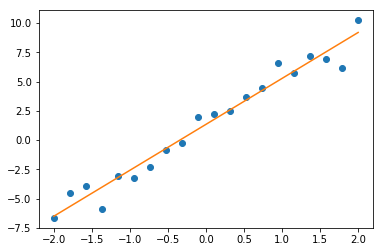

In [12]:
# TODO plot training samples

plt.plot(x, y, 'o')
plt.plot(x, w1*x+w0)
# TODO plot regression line


## Polynomial regression



## Generate dataset

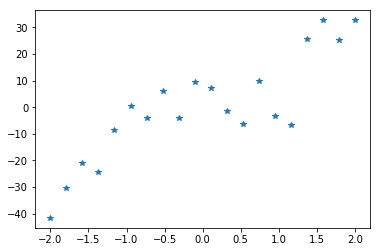

In [13]:
np.random.seed(100)

x = np.linspace(-2, 2, 20)
y = (np.random.uniform(-10, 10) * x ** 0 + np.random.uniform(-10, 10) * x ** 1 +
     np.random.uniform(-10, 10) * x ** 2 + np.random.uniform(-10, 10) * x ** 3)
y += np.random.randn(*y.shape) * 10

plt.plot(x, y, '*')

### Create feature matrix

Define a function that takes as inputs:
  - x: vector with n elements
  - degree

and outputs:

$X = \begin{bmatrix}
1 & x_1^1 & x_1^2 & \dots & x_1^{degree} \\
1 & x_2^1 & x_2^2 & \dots & x_2^{degree} \\
1 & x_3^1 & x_3^2 & \dots & x_3^{degree} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n^1 & x_n^2 & \dots & x_n^{degree} \\
\end{bmatrix}$

In [14]:
def feature_matrix(x, degree):
    n = len(x)
    matrix = np.ones((n,degree+1))
    for i in range(n):
        for j in range(degree+1):
            matrix[i][j] = x[i]**j;
    # print(matrix)
    return matrix
    

# X = feature_matrix([2,3,4], 4)
X = feature_matrix(x, 3)

### Compute weights

$w = (X^TX)^{-1}X^Ty$

In [15]:
w = np.linalg.inv(X.T .dot(X)) .dot(X.T) .dot(y)
# print(w)

## Plot training points and regression line

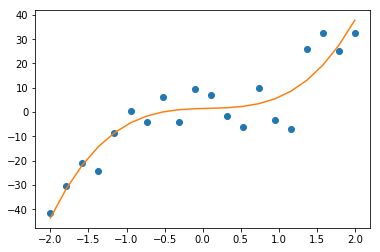

In [16]:
plt.plot(x, y, 'o')
plt.plot(x, X.dot(w))

## Run the experiment for different degrees

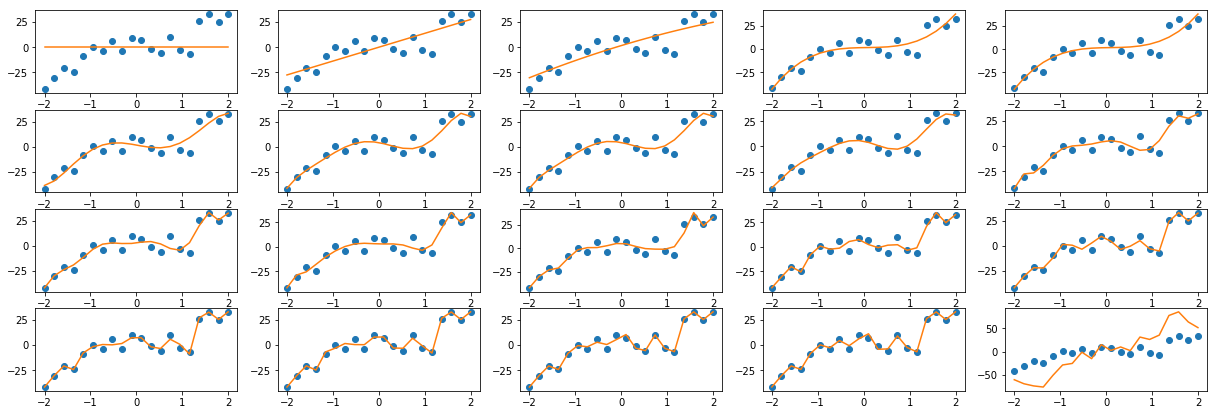

In [17]:
fig, axes = plt.subplots(4, 5)
axes = axes.ravel() # ravel() flattens a np array

for degree in range(20):
    # TODO 1. compute feature matrix
    X = feature_matrix(x, degree)
    
    # TODO 2. compute w
    w = np.linalg.inv(X.T .dot(X)) .dot(X.T) .dot(y)
    
    # TODO 3. plot training points and regression line
    axes[degree].plot(x, y, 'o')
    axes[degree].plot(x, X.dot(w))
    
    # HINT: when plotting use axes[degree].plot( ''' your code here ''' )
  
    fig.set_size_inches(21, 7)

  

# Sklearn



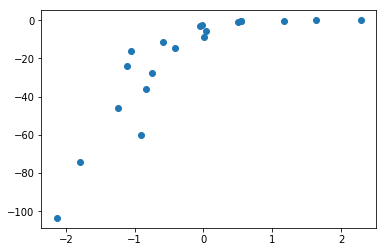

In [18]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 20, n_features=1, noise=10, bias=2, random_state=2)
C = 100
A = 1

y = (C + (y-C) - (y-C) **2 - 0.01 * (y-C)**3 + 0.004* (y-C)**5) + A* np.random.randn(20)
y /= 1e7
plt.plot(X, y, 'o')

## Visualize different regularization techniques

[ 0.         20.35626173]
[ 0.         19.52960271]
[ 0.         19.50969149]
[ 0.         14.00490764]


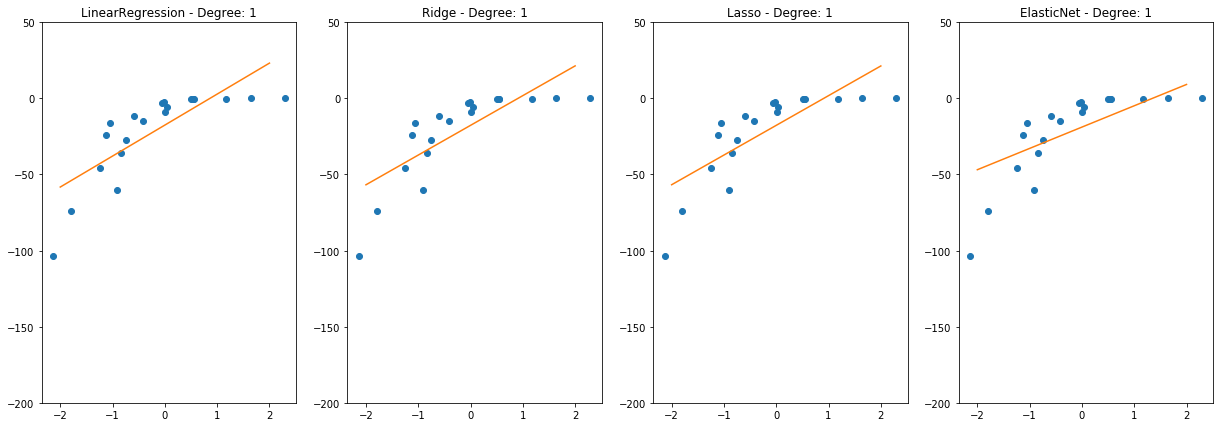

[ 0.         20.99144853 -9.49818741]
[ 0.         20.12384211 -9.26201181]
[ 0.         20.11310517 -9.02312157]
[ 0.         14.35258036 -7.39950358]


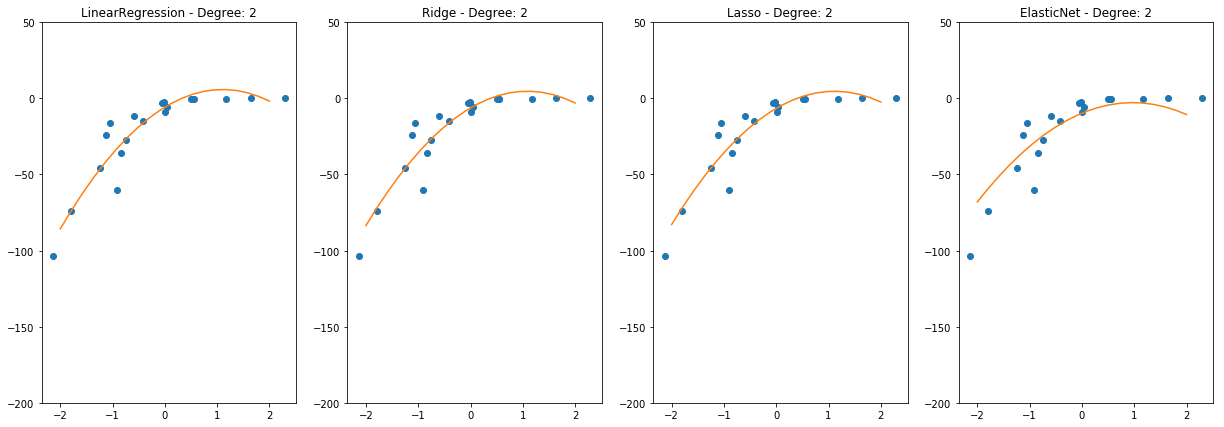

[ 0.         15.06520037 -9.76889508  1.89027794]
[ 0.         12.83957981 -9.61190215  2.42185264]
[ 0.         12.36975633 -9.37683335  2.47016995]
[ 0.          5.57876672 -7.97291041  3.98332823]


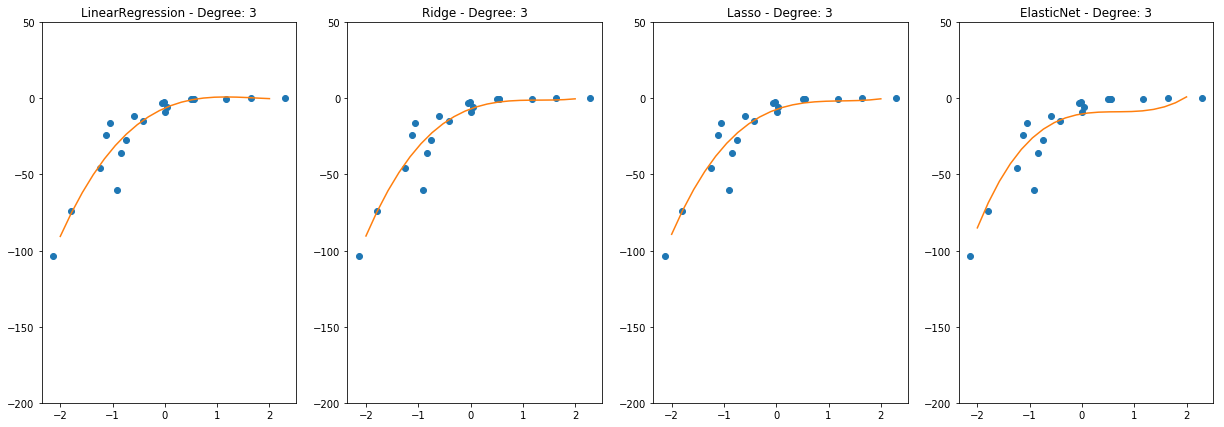

[ 0.         15.08277155 -9.51227704  1.8960765  -0.05498083]
[ 0.         12.95089638 -7.61879367  2.47637139 -0.43675811]
[ 0.         12.64075431 -5.37446426  2.56136733 -0.85778986]
[ 0.          5.68651103 -2.48925904  4.2589971  -1.44000521]


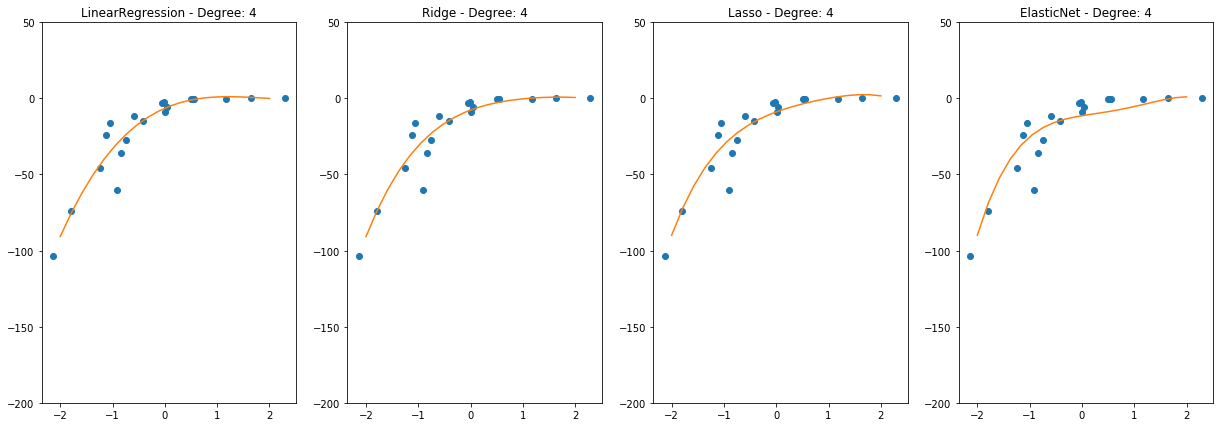

[ 0.         18.71315384 -8.72962409 -1.83497573 -0.3112445   0.6421904 ]
[ 0.         13.0399976  -7.60185336  2.36773711 -0.4433257   0.01965485]
[ 0.         15.04970716 -4.82124287  0.         -1.03930502  0.44763638]
[ 0.          5.69848826 -2.48485709  4.22156937 -1.44238461  0.00796832]


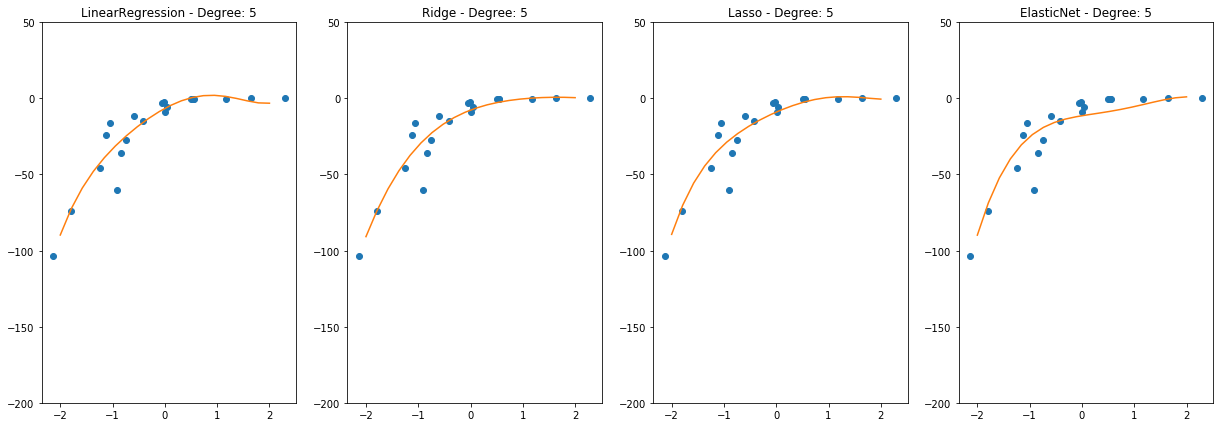

[  0.          17.96674993 -13.50298522  -1.71657212   2.77433837
   0.69782067  -0.44492342]
[ 0.00000000e+00  1.30864768e+01 -6.95760250e+00  2.41302781e+00
 -9.62762877e-01 -2.45476059e-03  8.19364300e-02]
[ 0.         15.04967503 -4.82160254  0.         -1.03923353  0.44763522
  0.        ]
[ 0.          5.72551205 -2.32346     4.1911377  -1.87486813  0.
  0.08394421]


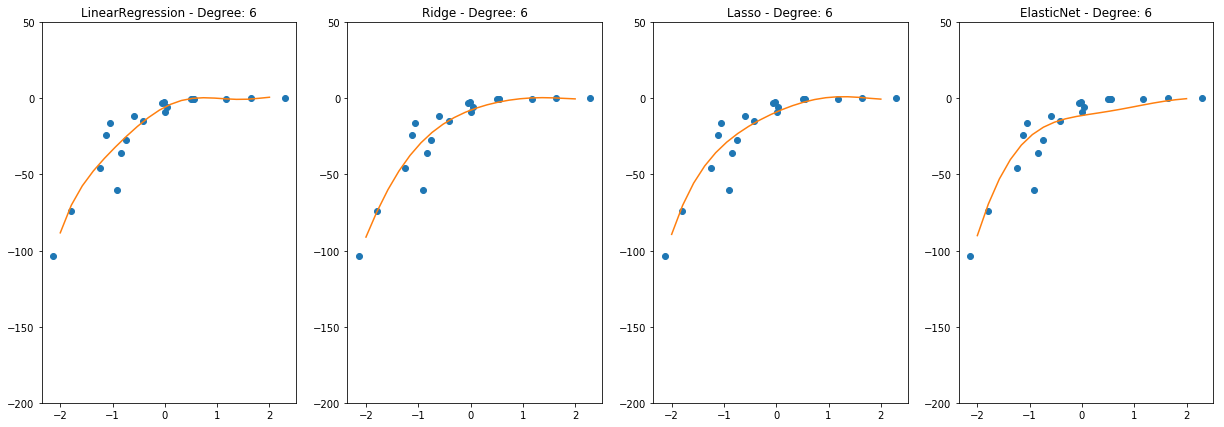

[  0.          22.5094949  -15.43429424 -11.80703727   3.7857285
   5.49305286  -0.53048516  -0.59568037]
[ 0.         12.89321763 -6.7621498   3.66766055 -1.02865857 -0.79838047
  0.07563327  0.11276619]
[ 0.         15.04976706 -4.82057803  0.         -1.03943715  0.4476385
  0.          0.        ]
[ 0.          5.15413575 -2.39971516  3.19484229 -2.00115891  1.41623987
  0.15128666 -0.24957413]


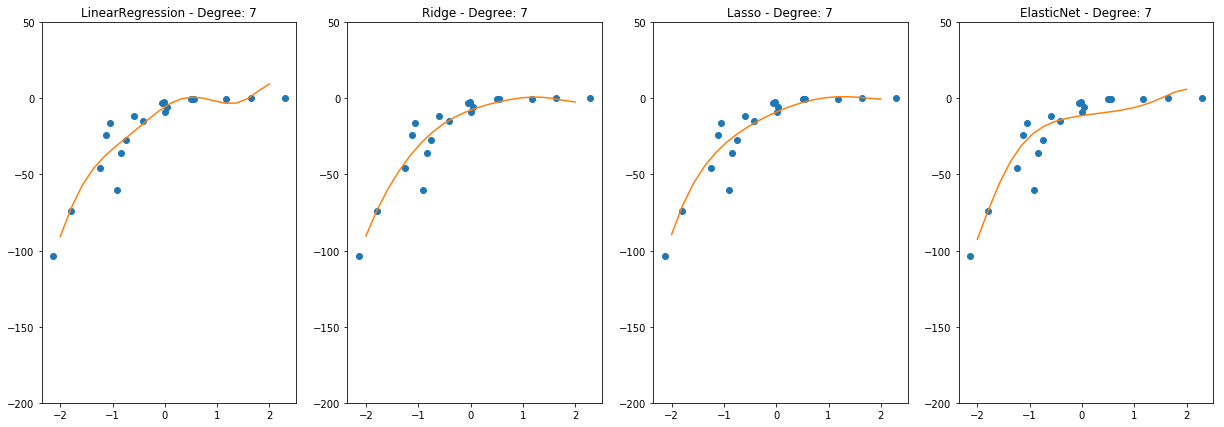

[  0.          20.70519198 -36.4803326   -8.07326325  32.90792917
   3.77427557 -11.97874598  -0.45321053   1.2935286 ]
[ 0.         12.84069931 -6.71277018  3.60397019 -1.52382723 -0.75078158
  0.35563313  0.10903997 -0.03695711]
[ 0.         15.52379347 -1.94395672  0.         -2.45989843  0.38268503
 -0.          0.          0.03666003]
[ 0.          5.22117088 -2.07463122  3.24986668 -1.55410656  1.40668421
 -0.35780171 -0.26115868  0.08358908]


/home/mdiannna/.local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


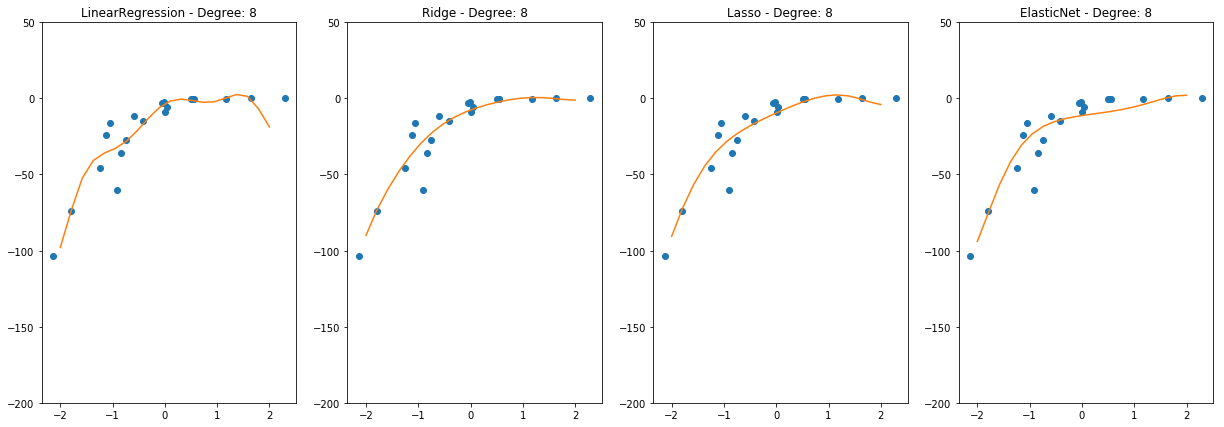

[  0.           1.67195382 -19.40280786  70.64933905  12.08721526
 -75.7207242   -4.28085039  26.67225218   0.56976258  -2.8458393 ]
[ 0.         12.96851456 -6.75675153  3.63612964 -1.57017277 -1.18919354
  0.39575888  0.33853141 -0.04095415 -0.02891696]
[ 0.00000000e+00  1.53540269e+01 -2.24722914e+00  0.00000000e+00
 -2.32706414e+00  2.92711266e-01 -0.00000000e+00  9.02129310e-02
  3.52588821e-02 -1.43210220e-02]
[ 0.          5.21967602 -2.13377461  3.09521337 -1.67012769  1.14949153
 -0.26060233 -0.05081608  0.07197103 -0.03065575]


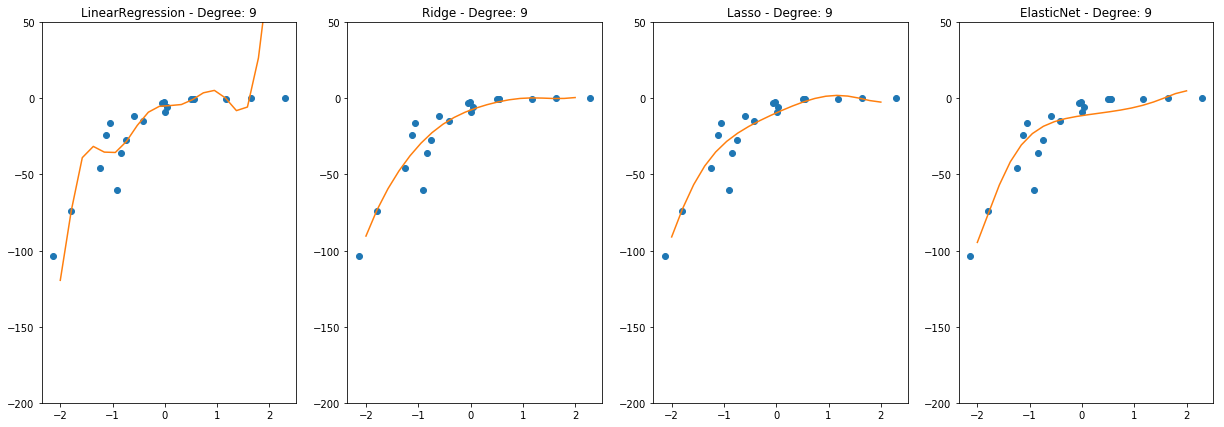

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

max_degree = 10

for degree in range(1, max_degree):
    features = PolynomialFeatures(degree=degree)
    X2 = features.fit_transform(X)
  
    fig, axes = plt.subplots(1, 4)
  
    for j, Model in enumerate([LinearRegression, Ridge, Lasso, ElasticNet]):
        # TODO 1. fit the model 
        clf = Model()

        # TODO 2. calculate ys with the polynomial features and weights
        clf.fit(X2, y)
        print(clf.coef_)
        
        # TODO 3. plot the points and the curve on the j axis 

        # HINT check out model.coef_ 
        # HINT create a linspace and use features.transform() on it

        X_plot = np.linspace(-2, 2, 20).reshape(20,1);
        X2_plot = features.fit_transform(X_plot);

        axes[j].plot(X, y, 'o');
        axes[j].plot(X_plot, clf.predict(X2_plot));

        
        # axes[j].set_title(Model.__name__ + " - Degree: " + str(i))
        axes[j].set_title(Model.__name__ + " - Degree: " + str(degree))
        axes[j].set_ylim((-200, 50))
        fig.set_size_inches(21, 7)
    plt.show()
  

## Real life application: Bike Sharing Dataset 

A simple dataset to hone your skills in regression techniques is the **bike sharing dataset** [1].  The goal is to predict **cnt** (the number of rented bikes) based on weather conditions, time of year etc. You can find more info in the dataset description. 

Take your time and explore this dataset. Plot some features together (with the regression line) to see how they are correlated. Try multiple types of regression.    

After exploring, try to predict **cnt**. Check out [3] and [4], for some ideas. Use **pandas** [2] to read the data and to do some more exploring (*hint: df.corr(), df.describe()*).

Calculate **MSE** and the **coefficient of determination**.

[1] [Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

[2] [Pandas Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf)

[3] [Hint](https://stats.stackexchange.com/questions/250376/feature-correlation-and-their-effect-of-logistic-regression)

[4] [Relevant Paper](http://cs229.stanford.edu/proj2014/Tanner%20Gilligan,%20Jean%20Kono,%20Prediction%20of%20Bike%20Rentals.pdf)

[5] [Dataset Analisys Example](https://github.com/mcleonard/blog_posts/blob/master/body_fat_percentage.ipynb)
